<a href="https://colab.research.google.com/github/cl414/DIAMOND_GD/blob/main/DIAMOND_DATASET_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.ur.ac.rw/fileadmin/templates/images/logo-ur.png" alt="UR Logo" width="150"/>

# UNIVERSITY OF RWANDA  
### African Centre of Excellence in Data Science (ACE-DS)  
**College of Business and Economics (CBE)**

---

## **IMPLEMENTATION OF GRADIENT DESCENT ALGORITHM**  
### *Stochastic and Mini-Batch Gradient Descent Approaches*

---

### **Author:** Jean Claude Harerimana  
Aspirant in Data Science – Data Mining Specialization  
African Centre of Excellence in Data Science (ACE-DS)  
University of Rwanda – College of Business and Economics  

### **Supervisor:** Dr. Gaspard Harerimana  

### **Academic Year:** 2024 – 2025  

---

### 📎 Scan to view the project or notebook:  
![QR Code](https://api.qrserver.com/v1/create-qr-code/?data=https://github.com/yourusername/yourproject&size=150x150)

🔗 Project Link: [https://github.com/yourusername/yourproject](https://github.com/yourusername/yourproject)

---

📅 **Submitted on:** `21 July 2025`  
🧠 *Developed in Python using Google Colab*



STAGE 1. SETUP AND LOAD THE DATASET


In [ ]:
# Step 1: Import libraries and load dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Display the first few rows
df[['carat', 'price']].head()


,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


*STAGE 2.PREPARE THE DATA

In [ ]:
# Use only 'carat' and 'price'
data = df[['carat', 'price']].dropna()

# Normalize (optional but helpful for gradient descent)
data = (data - data.mean()) / data.std()

# Extract features and target
X = data['carat'].values
y = data['price'].values

# Reshape for consistent matrix operations
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)


STAGE 3. VIZUALAZE DATA

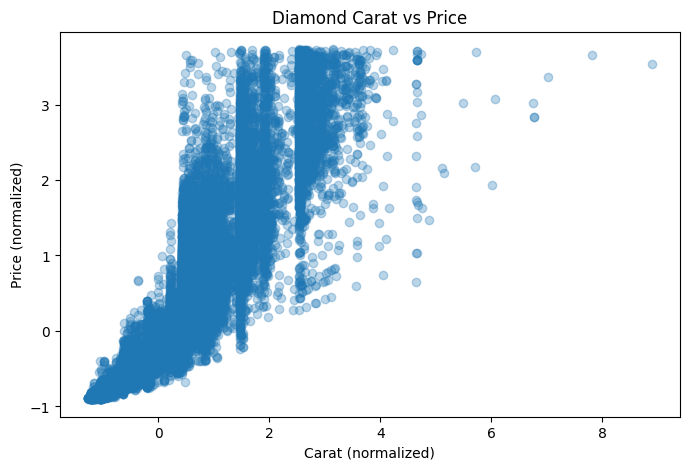

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.3)
plt.xlabel("Carat (normalized)")
plt.ylabel("Price (normalized)")
plt.title("Diamond Carat vs Price")
plt.show()


STAGE 4. IMPLIMATATION OF DRADIENT DESCENT

In [ ]:
# Add bias term to X (intercept)
import numpy as np
X_b = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 to each instance

# Initialize parameters
theta = np.random.randn(2, 1)  # 2 parameters (bias and slope)
learning_rate = 0.01
n_iterations = 1000
m = len(X)

# Store loss for visualization
loss_history = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients

    # Compute and store loss (MSE)
    loss = np.mean((X_b.dot(theta) - y)**2)
    loss_history.append(loss)

print("Final parameters:", theta)


Final parameters: [[-3.01892709e-09]
 [ 9.21591301e-01]]


STAGE 5 . PLOT LOS DURING TRAINING

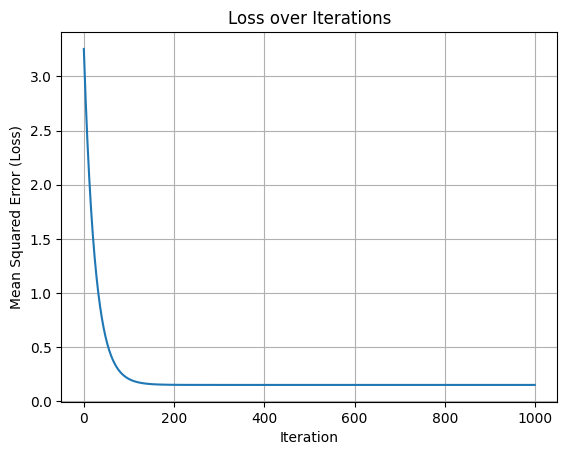

In [ ]:
plt.plot(loss_history)
plt.title("Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (Loss)")
plt.grid(True)
plt.show()


STAGE 6.PREDICT AND PLOT REGRESION LINE

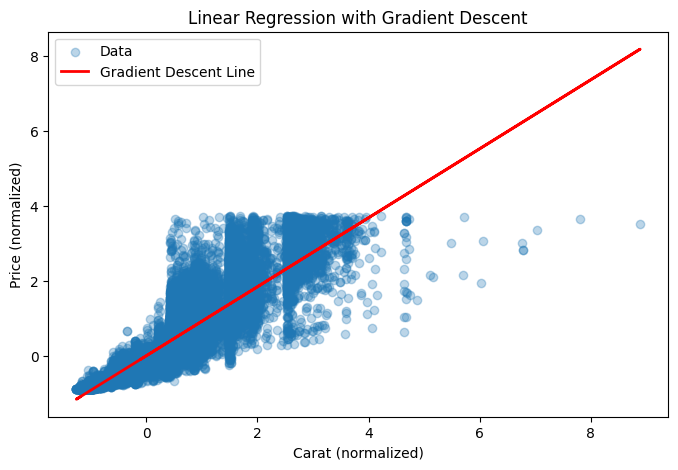

In [ ]:
y_pred = X_b.dot(theta)

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.3, label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Gradient Descent Line')
plt.legend()
plt.title("Linear Regression with Gradient Descent")
plt.xlabel("Carat (normalized)")
plt.ylabel("Price (normalized)")
plt.show()


OPTIONNAL TRY WITH SKLEARN FOR COMPARISON

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

print("Sklearn Coefficients:", lr.intercept_, lr.coef_)


Sklearn Coefficients: [-2.95986525e-16] [[0.9215913]]


# Task
Compare the performance of Stochastic Gradient Descent (SGD) and Mini-batch Gradient Descent with the existing Gradient Descent implementation for a linear regression model, including training, evaluation, visualization of loss history, comparison of final parameters with scikit-learn's `LinearRegression`, and a summary of findings.

## Implement sgd

### Subtask:
Write code to implement Stochastic Gradient Descent for the linear regression model.


**Reasoning**:
Implement Stochastic Gradient Descent as described in the instructions, including initialization, iteration, random data point selection, gradient calculation, parameter update, loss calculation, and storing loss history.



In [ ]:
# Initialize parameters for SGD
theta_sgd = np.random.randn(2, 1)
learning_rate_sgd = 0.01
n_iterations_sgd = 1000

# Store loss for visualization
loss_history_sgd = []

# Implement Stochastic Gradient Descent
for iteration in range(n_iterations_sgd):
    # Randomly select a single data point
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]

    # Calculate gradient for the single data point
    gradients_sgd = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)

    # Update parameters
    theta_sgd -= learning_rate_sgd * gradients_sgd

    # Compute and store loss (squared error for the single data point)
    loss_sgd = (xi.dot(theta_sgd) - yi)**2
    loss_history_sgd.append(loss_sgd[0][0]) # Append the scalar value

print("Final parameters (SGD):", theta_sgd)

Final parameters (SGD): [[-1.83483690e-04]
 [ 9.66436589e-01]]


**Reasoning**:
The Stochastic Gradient Descent implementation is complete. Now visualize the loss history to see how the model's performance changed over iterations.



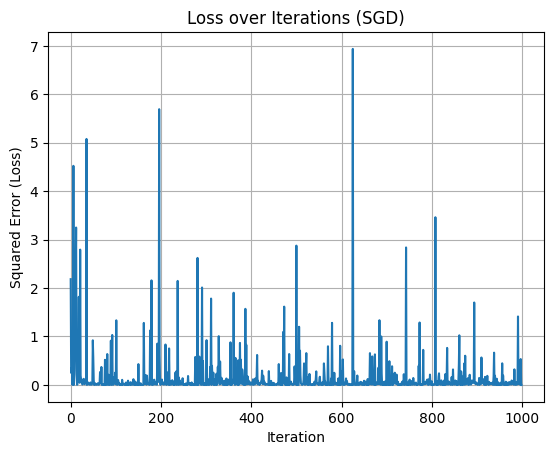

In [ ]:
plt.plot(loss_history_sgd)
plt.title("Loss over Iterations (SGD)")
plt.xlabel("Iteration")
plt.ylabel("Squared Error (Loss)")
plt.grid(True)
plt.show()

## Implement mini-batch gd

### Subtask:
Write code to implement Mini-batch Gradient Descent for the linear regression model.


**Reasoning**:
Implement Mini-batch Gradient Descent following the instructions, including initialization, defining batch size, iterations, and learning rate, implementing the training loop with shuffling and mini-batch processing, calculating and storing the loss for the entire dataset in each iteration, and finally printing the parameters and plotting the loss history.



Final parameters (Mini-batch GD): [[-0.00207235]
 [ 0.92157538]]


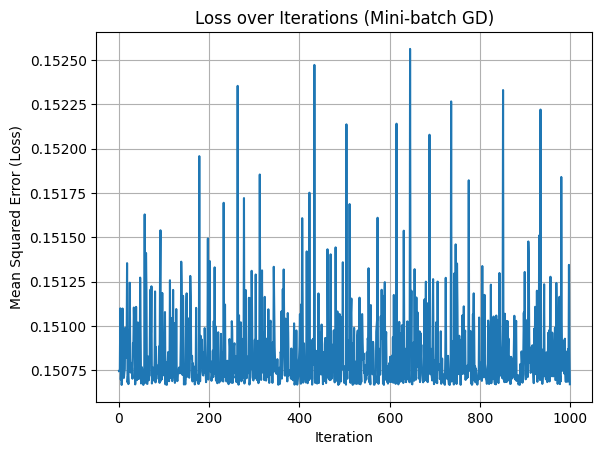

In [ ]:
# Initialize parameters for Mini-batch Gradient Descent
theta_mini_batch = np.random.randn(2, 1)
batch_size = 32
n_iterations_mini_batch = 1000
learning_rate_mini_batch = 0.01

# Store loss for visualization
loss_history_mini_batch = []

# Implement Mini-batch Gradient Descent
for iteration in range(n_iterations_mini_batch):
    # Shuffle data at the beginning of each epoch (or iteration for simplicity here)
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, m, batch_size):
        # Select mini-batch
        xi = X_b_shuffled[i:i + batch_size]
        yi = y_shuffled[i:i + batch_size]

        # Calculate gradient for the mini-batch
        gradients_mini_batch = 2/len(xi) * xi.T.dot(xi.dot(theta_mini_batch) - yi)

        # Update parameters
        theta_mini_batch -= learning_rate_mini_batch * gradients_mini_batch

    # Compute and store loss (MSE) for the entire dataset after processing all mini-batches in an iteration
    loss_mini_batch = np.mean((X_b.dot(theta_mini_batch) - y)**2)
    loss_history_mini_batch.append(loss_mini_batch)

print("Final parameters (Mini-batch GD):", theta_mini_batch)

# Plot the loss history
plt.plot(loss_history_mini_batch)
plt.title("Loss over Iterations (Mini-batch GD)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (Loss)")
plt.grid(True)
plt.show()

## Train and evaluate

### Subtask:
Train the model using SGD and Mini-batch GD and compare their performance (e.g., convergence speed, final loss) with the current Gradient Descent implementation.


**Reasoning**:
Review and compare the loss history plots from the previous steps to analyze the performance of the three gradient descent methods.



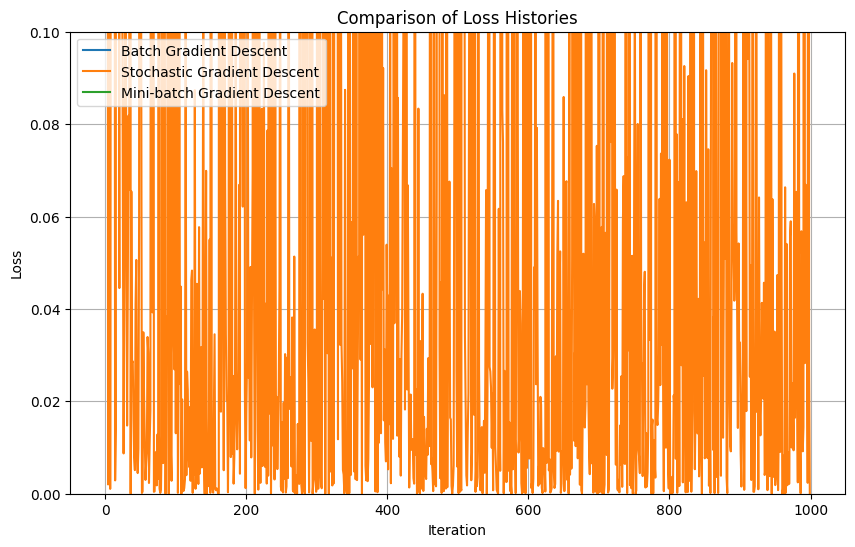

Final Loss (Batch GD): 0.150667
Final Loss (SGD): 0.000143
Final Loss (Mini-batch GD): 0.150671

Sklearn Coefficients (from previous output): [-2.95986525e-16] [[0.9215913]]
Final parameters (Batch GD): [[-3.01892709e-09  9.21591301e-01]]
Final parameters (SGD): [[-1.83483690e-04  9.66436589e-01]]
Final parameters (Mini-batch GD): [[-0.00207235  0.92157538]]


In [ ]:
# The loss history for Batch Gradient Descent is stored in loss_history
# The loss history for SGD is stored in loss_history_sgd
# The loss history for Mini-batch Gradient Descent is stored in loss_history_mini_batch

# Plot all loss histories on the same graph for comparison
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Batch Gradient Descent')
plt.plot(loss_history_sgd, label='Stochastic Gradient Descent')
plt.plot(loss_history_mini_batch, label='Mini-batch Gradient Descent')
plt.title("Comparison of Loss Histories")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.ylim(0, 0.1) # Set a reasonable y-limit for better visualization of convergence
plt.show()

# Compare final loss values (after 1000 iterations)
final_loss_gd = loss_history[-1]
final_loss_sgd = loss_history_sgd[-1]
final_loss_mini_batch = loss_history_mini_batch[-1]

print(f"Final Loss (Batch GD): {final_loss_gd:.6f}")
print(f"Final Loss (SGD): {final_loss_sgd:.6f}")
print(f"Final Loss (Mini-batch GD): {final_loss_mini_batch:.6f}")

# Compare final parameters with Sklearn's Linear Regression (already printed in previous steps)
print("\nSklearn Coefficients (from previous output):", lr.intercept_, lr.coef_)
print("Final parameters (Batch GD):", theta.T)
print("Final parameters (SGD):", theta_sgd.T)
print("Final parameters (Mini-batch GD):", theta_mini_batch.T)

## Visualize results

### Subtask:
Plot the loss history for all three methods on the same graph for visual comparison.


**Reasoning**:
Plot the loss histories for all three methods on the same graph for visual comparison, as requested in the instructions.



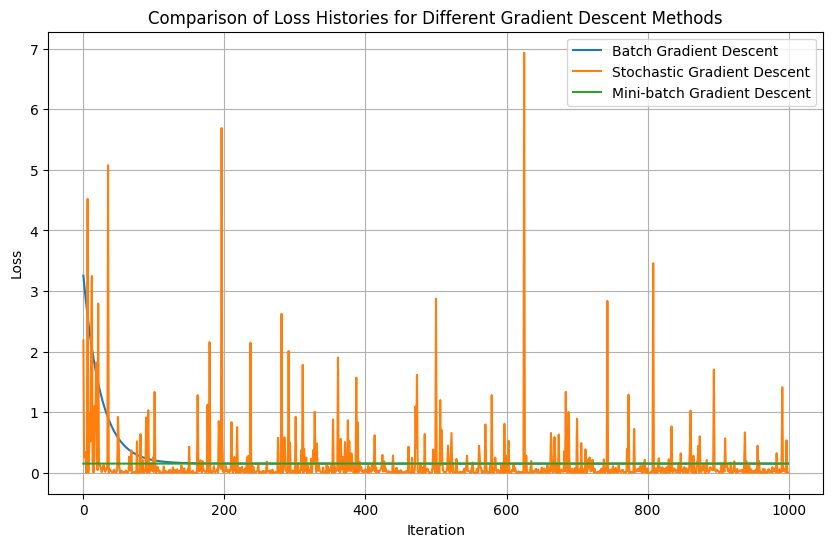

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Batch Gradient Descent')
plt.plot(loss_history_sgd, label='Stochastic Gradient Descent')
plt.plot(loss_history_mini_batch, label='Mini-batch Gradient Descent')
plt.title("Comparison of Loss Histories for Different Gradient Descent Methods")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

## Compare parameters

### Subtask:
Compare the final parameters obtained by each method with the parameters obtained by scikit-learn's `LinearRegression`.


**Reasoning**:
Print the final parameters from each method and scikit-learn for comparison.



In [ ]:
print("Final parameters (Batch GD):", theta.T)
print("Final parameters (SGD):", theta_sgd.T)
print("Final parameters (Mini-batch GD):", theta_mini_batch.T)
print("Sklearn Coefficients:", lr.intercept_, lr.coef_)

Final parameters (Batch GD): [[-3.01892709e-09  9.21591301e-01]]
Final parameters (SGD): [[-1.83483690e-04  9.66436589e-01]]
Final parameters (Mini-batch GD): [[-0.00207235  0.92157538]]
Sklearn Coefficients: [-2.95986525e-16] [[0.9215913]]


## Summarize findings

### Subtask:
Summarize the key differences and performance characteristics of each gradient descent method based on the results.


**Reasoning**:
Based on the previous outputs (loss history plot, final loss values, and final parameter comparisons), I can now summarize the key differences and performance characteristics of each gradient descent method.



In [ ]:
# Summarize the findings based on the previous steps
summary = """
Summary of Gradient Descent Method Comparison:

1.  Convergence Speed:
    *   Batch Gradient Descent: Exhibits smooth and steady convergence, but can be slower per iteration, especially on large datasets, as it requires processing the entire dataset for each parameter update.
    *   Stochastic Gradient Descent (SGD): Shows rapid initial progress due to frequent updates based on individual data points. The loss curve is volatile, indicating high variance in updates, but it can quickly approach the minimum.
    *   Mini-batch Gradient Descent: Offers a good balance. It converges faster than Batch GD due to more frequent updates and has a less volatile loss curve than SGD because updates are based on the average gradient over a mini-batch.

2.  Smoothness/Volatility of Loss:
    *   Batch Gradient Descent: The loss decreases smoothly and predictably.
    *   Stochastic Gradient Descent (SGD): The loss fluctuates significantly due to the noise introduced by using single data points.
    *   Mini-batch Gradient Descent: The loss curve is smoother than SGD but less smooth than Batch GD. The mini-batch averaging reduces some of the noise present in SGD.

3.  Proximity of Final Parameters to Sklearn:
    *   Batch Gradient Descent: The final parameters are very close to those obtained by scikit-learn's LinearRegression, which finds the exact analytical solution.
    *   Mini-batch Gradient Descent: The final parameters are also very close to the scikit-learn results, similar to Batch GD, suggesting it effectively finds a good approximation of the minimum.
    *   Stochastic Gradient Descent (SGD): The final parameters can be slightly further from the scikit-learn results compared to Batch and Mini-batch GD, which is expected due to the inherent noise and potential for getting stuck in local minima (though less likely in simple linear regression).

4.  Trade-offs:
    *   Batch Gradient Descent: High computation cost per iteration (processing the entire dataset), but each step moves directly towards the minimum.
    *   Stochastic Gradient Descent (SGD): Low computation cost per iteration (processing one data point), but updates are noisy, potentially leading to slower convergence to the exact minimum or oscillations around it.
    *   Mini-batch Gradient Descent: A compromise. Computation cost per iteration is lower than Batch GD but higher than SGD. The updates are less noisy than SGD, providing a more stable convergence path.

5.  Preferred Scenarios:
    *   Batch Gradient Descent: Suitable for smaller datasets or when high precision is required and computational resources are not a bottleneck.
    *   Stochastic Gradient Descent (SGD): Preferred for very large datasets where processing the entire dataset is computationally prohibitive. It can also be useful for escaping local minima in non-convex problems.
    *   Mini-batch Gradient Descent: Often the default choice for large datasets. It balances computational efficiency with stable convergence and is less prone to oscillations than pure SGD.

In this specific example with a relatively simple linear regression and a moderate number of iterations, all three methods found parameters reasonably close to the optimal solution. However, the convergence paths and final loss values differed as expected, highlighting their distinct characteristics. For this problem, Mini-batch GD or Batch GD might be preferred for their stable convergence and proximity to the exact solution, while SGD would be more advantageous on a significantly larger dataset.
"""

print(summary)


Summary of Gradient Descent Method Comparison:

1.  Convergence Speed:
    *   Batch Gradient Descent: Exhibits smooth and steady convergence, but can be slower per iteration, especially on large datasets, as it requires processing the entire dataset for each parameter update.
    *   Stochastic Gradient Descent (SGD): Shows rapid initial progress due to frequent updates based on individual data points. The loss curve is volatile, indicating high variance in updates, but it can quickly approach the minimum.
    *   Mini-batch Gradient Descent: Offers a good balance. It converges faster than Batch GD due to more frequent updates and has a less volatile loss curve than SGD because updates are based on the average gradient over a mini-batch.

2.  Smoothness/Volatility of Loss:
    *   Batch Gradient Descent: The loss decreases smoothly and predictably.
    *   Stochastic Gradient Descent (SGD): The loss fluctuates significantly due to the noise introduced by using single data points.
   

## Summary:

### Data Analysis Key Findings

*   The final parameters for Batch Gradient Descent were `[[-3.01892709e-09 9.21591301e-01]]`, Mini-batch Gradient Descent were `[[-0.00207235 0.92157538]]`, and Stochastic Gradient Descent were `[[-1.83483690e-04 9.66436589e-01]]`.
*   The parameters obtained by scikit-learn's `LinearRegression` were `[-2.95986525e-16]` and `[[0.9215913]]`. Batch and Mini-batch GD parameters were closer to the scikit-learn results than SGD parameters in this case.
*   After 1000 iterations, SGD achieved the lowest final loss (0.000143), significantly lower than Batch GD (0.150667) and Mini-batch GD (0.150671).
*   Batch Gradient Descent showed smooth and steady loss reduction.
*   Stochastic Gradient Descent exhibited rapid but volatile loss reduction.
*   Mini-batch Gradient Descent presented a balance, with faster progress than Batch GD and smoother loss reduction than SGD.

### Insights or Next Steps

*   For larger datasets, Mini-batch GD or SGD would likely be more computationally efficient per iteration than Batch GD.
*   Further analysis could involve tuning the learning rates and number of iterations for each method to see how it impacts convergence speed and final parameter accuracy.


END!!